In [142]:
# ein bild suchen, wo was kreisförmiges drauf ist.
# https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html

import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [143]:
# src = cv.imread("opencv-logo-small.png", 1) # geht nicht
# src = cv.imread("smarties.png", 1) # geht gut
# src = cv.imread("stock-vector-a-lot-black-circles-into-each-other-leaving-in-a-distance-equal-to-the-thickness-of-all-lines-380367541.jpg",
#                 1) # findet einen von vielen
# src = cv.imread("Four-Circles-white_6.jpg", 1) # geht nicht
# src = cv.imread("8_circles_stem_7e983822f8062cd1ee1319c3b0a6da3f.jpg", 1) # geht nicht

In [144]:
src = cv.imread("bearsnstuff.png", 1) # geht mittelgut
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)

In [145]:
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# gray = cv.medianBlur(gray, 5)

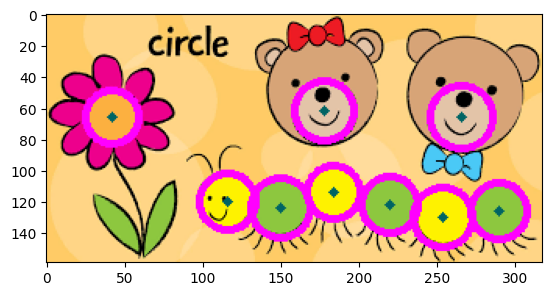

In [146]:
# here is where the transformation happens
rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
param1=100, param2=30,
minRadius=1, maxRadius=30)

# param1: wie streng ist der algorithmus beim kanten erkennen
# param2: wieviele schnittpunkte. i.e. wieviele punkte auf dem kreis liegen

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(src, center, radius, (255, 0, 255), 3)
plt.imshow(src)